In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df = df.rename(columns={
    'Gender':'gender','Age':'age','Annual Income (k$)':'annual_income','Spending Score (1-100)':'spending_score'
})
df['gender'].replace(['Female','Male'],[0,1], inplace=True)

In [4]:
df.head()

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [5]:
from sklearn.cluster import KMeans

In [6]:
# drop column cust id dan gender
X = df.drop(['CustomerID','gender'],axis=1)
# membuat list yang berisi inertia
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

Text(0,0.5,'Inertia')

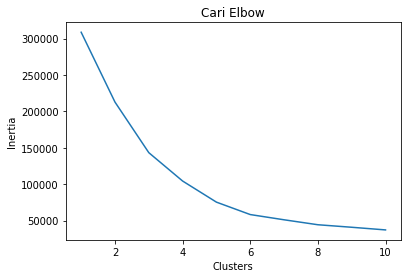

In [7]:
plt.plot(list(range(1,11)),clusters)
plt.title("Cari Elbow")
plt.xlabel("Clusters")
plt.ylabel("Inertia")

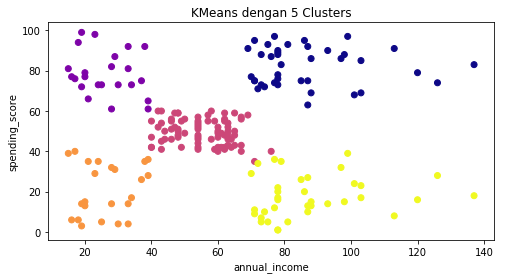

In [16]:
km5 = KMeans(n_clusters=5).fit(X)
# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_

plt.figure(figsize=(8,4))
plt.scatter(X['annual_income'],X['spending_score'],c=X['Labels'],cmap='plasma')
plt.title('KMeans dengan 5 Clusters')
plt.legend()
plt.xlabel('annual_income')
plt.ylabel('spending_score')
plt.show()